In [3]:
import netCDF4 as nc
import rasterio
import xarray as xr
import matplotlib.pyplot as plt


In [4]:
# File paths
file_paths = [
    r'data\lai\lai.daily.0d50_CentralEurope.2018.nc',
    r'data\lai\lai.daily.0d50_CentralEurope.2019.nc',
    r'data\lai\lai.daily.0d50_CentralEurope.2020.nc',
    r'data\lai\lai.daily.0d50_CentralEurope.2021.nc'
]

# Load the data
data_sets = [xr.open_dataset(fp) for fp in file_paths]

# Assuming the variable name is consistent and known, typically it might be named 'temperature' or similar
# We'll check the first dataset for the variable name to use
variable_name = list(data_sets[0].data_vars)[0]  # Use the first variable available
variable_name



'lai'

In [11]:
# Combine the datasets along the time dimension and calculate the maximum for each grid cell across the years
combined_data = xr.concat(data_sets, dim='time')
summer_data = combined_data.sel(time=combined_data['time'].dt.month.isin([4, 5, 6, 7, 8, 9]))

min_lai = combined_data['lai'].min(dim='time')
summer_mean_lai = summer_data['lai'].mean(dim='time')


min_lai.to_netcdf('data/aggregated_over_years_model_input/lai_min.nc')
summer_mean_lai.to_netcdf('data/aggregated_over_years_model_input/lai_sum_mean.nc')


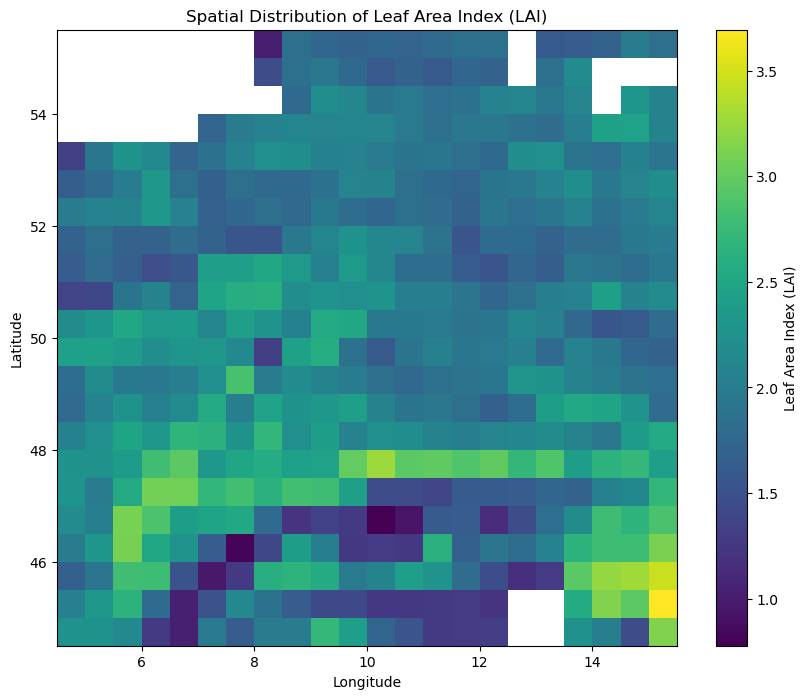

In [13]:

data = xr.open_dataset('data/aggregated_over_years_model_input/lai_sum_mean.nc')

# Plot the spatial distribution of the 'lai' variable
plt.figure(figsize=(10, 8))
plt.pcolormesh(data.longitude, data.latitude, data.lai, shading='auto')
plt.colorbar(label='Leaf Area Index (LAI)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Leaf Area Index (LAI)')
plt.show()

